In [379]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [380]:
### ARCHIVE ###
def define_quartzOLD(quartz_params, quartz_position):  ##### SETS UP THE QUARTZ RADIATOR WITH THE SPECIFIED POSITION USED AS THE CENTRE OF THE SHAPE
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    # Plot Quartz Radiator
    Z  = np.array([[qax-quartz_depth, qay-quartz_width, qaz-quartz_height],
                    [qax-quartz_depth, qay-quartz_width, qaz+quartz_height],
                    [qax-quartz_depth, qay+quartz_width, qaz+quartz_height],
                    [qax-quartz_depth, qay+quartz_width, qaz-quartz_height],
                    [qax+quartz_depth, qay-quartz_width, qaz-quartz_height],
                    [qax+quartz_depth, qay-quartz_width, qaz+quartz_height],
                    [qax+quartz_depth, qay+quartz_width, qaz+quartz_height],
                    [qax+quartz_depth, qay+quartz_width, qaz-quartz_height]])
    
    verts = [[Z[0],Z[1],Z[2],Z[3]],
            [Z[4],Z[5],Z[6],Z[7]],
            [Z[0],Z[1],Z[5],Z[4]],
            [Z[2],Z[3],Z[7],Z[6]],
            [Z[1],Z[2],Z[6],Z[5]],
            [Z[4],Z[7],Z[3],Z[0]]]

    return verts

def define_quartz2(quartz_params, quartz_position):      ##### SETS UP THE QUARTZ RADIATOR WITH THE SPECIFIED POSITION USED AS THE BOTTOM LEFT CORNE OF SHAPE
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    
    # Define vertices
    Z = np.array([
        [qax, qay, qaz],
        [qax, qay, qaz + quartz_height],
        [qax, qay + quartz_width, qaz + quartz_height],
        [qax, qay + quartz_width, qaz],
        [qax + quartz_depth, qay, qaz],
        [qax + quartz_depth, qay, qaz + quartz_height],
        [qax + quartz_depth, qay + quartz_width, qaz + quartz_height],
        [qax + quartz_depth, qay + quartz_width, qaz]
    ])
    
    verts = [
        [Z[0], Z[1], Z[2], Z[3]],
        [Z[4], Z[5], Z[6], Z[7]],
        [Z[0], Z[1], Z[5], Z[4]],
        [Z[2], Z[3], Z[7], Z[6]],
        [Z[1], Z[2], Z[6], Z[5]],
        [Z[4], Z[7], Z[3], Z[0]]
    ]

    return verts


In [381]:
# Visualisation functions
def define_quartz(quartz_params, quartz_position):    ##### SETS UP THE QUARTZ RADIATOR WITH THE SPECIFIED POSITION USED AS THE CENTRE OF THE FRONT FACE
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    
    half_quartz_width = quartz_width / 2
    half_quartz_height = quartz_height / 2
    
    # Define vertices with symmetry on y and z dimensions
    Z = np.array([
        [qax, qay - half_quartz_width, qaz - half_quartz_height],
        [qax, qay - half_quartz_width, qaz + half_quartz_height],
        [qax, qay + half_quartz_width, qaz + half_quartz_height],
        [qax, qay + half_quartz_width, qaz - half_quartz_height],
        [qax + quartz_depth, qay - half_quartz_width, qaz - half_quartz_height],
        [qax + quartz_depth, qay - half_quartz_width, qaz + half_quartz_height],
        [qax + quartz_depth, qay + half_quartz_width, qaz + half_quartz_height],
        [qax + quartz_depth, qay + half_quartz_width, qaz - half_quartz_height]
    ])
    
    verts = [
        [Z[0], Z[1], Z[2], Z[3]],
        [Z[4], Z[5], Z[6], Z[7]],
        [Z[0], Z[1], Z[5], Z[4]],
        [Z[2], Z[3], Z[7], Z[6]],
        [Z[1], Z[2], Z[6], Z[5]],
        [Z[4], Z[7], Z[3], Z[0]]
    ]

    return verts

def visulise_tracks(tracks_list, quartz_position, quartz_params):
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create Quartz Radiator
    verts = define_quartz(quartz_params, quartz_position)
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.20))
    
    # Plot tracks
    for track in tracks_list:
        track_id, init_vertex, quartz_in_vtx, quartz_out_vtx = track.get_track_data()
        # stack vertices vectors together into one array 
        vertices = np.vstack((init_vertex, quartz_in_vtx, quartz_out_vtx))
        # plot track
        ax.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], label=f"Track {track_id}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0, qax + (quartz_depth*3))
    ax.set_ylim(-(quartz_width*1.4), qay + (quartz_width*1.4))
    ax.set_zlim(qaz-quartz_height, qaz+quartz_height)
    plt.legend()
    plt.show()

def visulise_quartz(tracks_list, cherenkov_track_list, quartz_position, quartz_params):        
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create Quartz Radiator
    verts = define_quartz(quartz_params, quartz_position)
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.20))
    
    # Plot tracks
    for track in tracks_list:
        if track.track_hit_radiator:
            track_id, init_vertex, quartz_in_vtx, quartz_out_vtx = track.get_track_data()
            # mark impacts
            ax.scatter(quartz_in_vtx[0], quartz_in_vtx[1], quartz_in_vtx[2], c='r', marker='o', s=1, alpha=0.5)
            ax.scatter(quartz_out_vtx[0], quartz_out_vtx[1], quartz_out_vtx[2], c='r', marker='o', s=1, alpha=0.5)
            # plot track
            vertices = np.vstack((init_vertex, quartz_in_vtx, quartz_out_vtx))
            ax.plot(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='b', alpha=0.4, label=f"Track {track_id}")
        
    # plot cherenkov photon tracks
    for cherenkov_track in cherenkov_track_list:
        track_id, daughter_id, reflection_vertex_list = cherenkov_track.get_track_data()

        reflection_vertex_list = np.array(reflection_vertex_list)
        radiator_exit_vertex = reflection_vertex_list[-1]
        radiator_exit_direction_vector = cherenkov_track.radiator_exit_direction_vector
        # plot track
        ax.plot(reflection_vertex_list[:, 0], reflection_vertex_list[:, 1], reflection_vertex_list[:, 2], c='g', alpha=0.4, label=f"Daghter {daughter_id} of Track {track_id}")

        ### note: fix this error!!!!!!!
        # plot a short line that extends from the radiator exit vertex in the direction of the radiator exit direction vector
        ax.plot([radiator_exit_vertex[0], radiator_exit_vertex[0] + (radiator_exit_direction_vector[0]*quartz_depth)/2],
                [radiator_exit_vertex[1], radiator_exit_vertex[1] + (radiator_exit_direction_vector[1]*quartz_width)/2],
                [radiator_exit_vertex[2], radiator_exit_vertex[2] + (radiator_exit_direction_vector[2]*quartz_height)/2], c='g', alpha=0.9)
        

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')    
    ax.set_xlim(qax - (quartz_depth*2), qax + (quartz_depth*3))
    ax.set_ylim(qay-(quartz_width*1.4), qay + (quartz_width*1.4))
    ax.set_zlim(qaz-quartz_height, qaz+quartz_height)

    plt.show()



### Particle tracks
class ParticleTrack:
    def __init__(self, track_id, energy, init_vertex, init_dir_vector, quartz_position, quartz_params, particle_type):
        self.track_id = track_id  # Unique identifier for the track
        self.particle_type = particle_type  # Type of particle (e.g., electron, proton, etc.)
        self.energy = energy  # Energy of the particle track
        self.init_vertex = np.array(init_vertex)  # Starting position of the particle track (x, y, z)
        self.init_dir_vector = np.array(init_dir_vector)  # Ending position of the particle track (x, y, z)
        self.distance_to_quartz = quartz_position[0] # Quartz front face straight line distance from 0, 0, 0
        self.quartz_depth = quartz_params[0] # Quartz depth
        self.quartz_height = quartz_params[1] # Quartz height
        self.quartz_width = quartz_params[2] # Quartz width
        self.propegate_track()

    def propegate_track(self):
        # Propagate the particle track through the detector by taking star6ting position and direction vector and then finding intersection with detector quartz

        # Normalise dir vector
        norm_dir_vector = self.init_dir_vector / np.linalg.norm(self.init_dir_vector)

        # using trig find the coordinate on the detector face which is a plane that lies at (distance_to_quartz, 0, 0) from the start point of init_vertex following the direction of norm_dir_vector
        x = self.distance_to_quartz
        y = x * norm_dir_vector[1] / norm_dir_vector[0]
        z = x * norm_dir_vector[2] / norm_dir_vector[0]

        # calculate length of track befor hitting detector face
        length = np.sqrt(x**2 + y**2 + z**2)
        
        # check if track hits detector face
        if y < self.quartz_width/2 and y > -self.quartz_width/2 and z < self.quartz_height/2 and z > -self.quartz_height/2:
            self.quartz_in_vtx = np.array((x, y, z))
            self.tracklength = length

            # using trig find the coordinate on the detector face which is a plane that lies at (distance_to_quartz, 0, 0) from the start point of init_vertex following the direction of norm_dir_vector
            x = self.distance_to_quartz + self.quartz_depth
            y = x * norm_dir_vector[1] / norm_dir_vector[0]
            z = x * norm_dir_vector[2] / norm_dir_vector[0]
            self.quartz_out_vtx = np.array((x, y, z))

            # calculate length of track inside quartz radiator
            length2 = np.sqrt(x**2 + y**2 + z**2)
            self.radiator_path_length = length2 - length
            self.track_hit_radiator = True
        
        else:
            self.quartz_in_vtx = np.array((x, y, z))
            self.quartz_out_vtx = np.array((np.nan, np.nan, np.nan))
            self.tracklength = np.nan
            self.radiator_path_length = np.nan
            self.track_hit_radiator = False

    def radiate_cherenkov(self, number_of_photons):
        # Create cherenkov photons from the particle track
        #select number_of_photons random points along the track from self.quartz_in_vtx to self.quartz_out_vtx which are 3d vectors

        # Create cherenkov photons from the particle track
        cherenkov_photons_origin_vertex_list = []

        for _ in range(number_of_photons):
            # Generate a random interpolation parameter between 0 and 1
            t = np.random.random()

            # Calculate the random point along the track
            random_point = self.quartz_in_vtx + t * (self.quartz_out_vtx - self.quartz_in_vtx)

            # Append the random point to the list of cherenkov photons
            cherenkov_photons_origin_vertex_list.append(random_point)

        return cherenkov_photons_origin_vertex_list

    def get_track_data(self):
        return self.track_id, self.init_vertex, self.quartz_in_vtx, self.quartz_out_vtx
    
    def print_info(self):
        # Print information about the particle track
        print(f"Track ID: {self.track_id}")
        print(f"Particle Type: {self.particle_type}")
        print(f"Energy: {self.energy} MeV")
        print(f"Initial Vertex: {self.init_vertex}")
        print(f"Initial Direction Vector: {self.init_dir_vector}")
        print(f"Distance to Quartz: {self.distance_to_quartz} m")
        print(f"Quartz Depth: {self.quartz_depth} m")
        print(f"Track Length: {self.tracklength} m")
        print(f"Track Length in Quartz: {self.radiator_path_length} m")
        print(f"Quartz Near Side Intersection Vertex: {self.quartz_in_vtx}")
        print(f"Quartz Far Side Intersection Vertex: {self.quartz_out_vtx}")
        print("\n")

### Cherenkov photons
class cherenkov_photon():
    def __init__(self, track_id, daughter_track_id, energy, init_vertex, quartz_params, quartz_position):
        self.track_id = track_id  # Unique identifier for the mother particle track
        self.daughter_track_id = daughter_track_id  # Unique identifier for the cherenkov photon track
        self.particle_type = "photon"  # Type of particle (e.g., electron, proton, etc.)
        self.energy = energy  # Energy of the photon
        self.init_vertex = init_vertex  # Starting position of the particle track (x, y, z)
        # genrate random normalised direction vetors from a uniform distribution
        init_dir_vector = np.random.uniform(size=3)
        self.init_dir_vector = init_dir_vector / np.linalg.norm(init_dir_vector) 
        self.quartz_params = quartz_params
        self.quartz_position = quartz_position       
        self.radiator_mouth_exit_vertex = np.array([np.nan, np.nan, np.nan])
        self.radiator_mouth_exit_direction_vector = np.array([np.nan, np.nan, np.nan])
        self.mirror_reflection_coordinate = np.array([np.nan, np.nan, np.nan]) # Mirror reflection coordinate
        self.mirror_reflection_direction_vector = np.array([np.nan, np.nan, np.nan]) # Mirror reflection direction vector
        self.mcp_global_coordinate = np.array([np.nan, np.nan, np.nan]) # MCP reflection coordinate
        self.MCP_local_coordinate = np.array([np.nan, np.nan, np.nan])
        self.propegate_photon(init_vertex, init_dir_vector)
        self.propegate_through_focusing_block()
        self.readout_MCP()
        
    def print_info(self):
        print(f"Track ID: {self.track_id}")
        print(f"Daughter Track ID: {self.daughter_track_id}")
        print(f"Particle Type: {self.particle_type}")
        print(f"Energy: {self.energy} MeV")
        print(f"Initial Vertex: {self.init_vertex}")
        print(f"Initial Direction Vector: {self.init_dir_vector}")
        print(f"Surface Intersections: {self.surface_intersections_list}")
        print(f"Radiator Exit Vertex: {self.radiator_exit_vertex}")
        print(f"Radiator Exit Direction Vector: {self.radiator_exit_direction_vector}")
        print(f"Radiator Path Length: {self.radiator_path_length}")
        print("\n")

    def find_intersection_3d(self, direction_vector, initial_point, quartz_params, quartz_position, tolerance=1e-6):
        import math

        x_dir, y_dir, z_dir = direction_vector
        x_0, y_0, z_0 = initial_point
        qax, qay, qaz = quartz_position
        quartz_depth, quartz_width, quartz_height = quartz_params
        
        # Ensure non-zero direction vector components and vector length
        if math.isclose(x_dir, 0.0, rel_tol=tolerance) and math.isclose(y_dir, 0.0, rel_tol=tolerance) and math.isclose(z_dir, 0.0, rel_tol=tolerance):
            raise ValueError("Direction vector has zero length")
        
        # Define the boundaries of the box
        x_min = qax - quartz_depth
        x_max = qax + quartz_depth
        y_min = qay - quartz_width
        y_max = qay + quartz_width
        z_min = qaz - quartz_height
        z_max = qaz + quartz_height
        
        # Solve for t when the direction vector intersects with box's x boundaries
        t_x_min = (x_min - x_0) / x_dir
        t_x_max = (x_max - x_0) / x_dir
        
        # Solve for corresponding y and z values at t_x_min and t_x_max
        y_x_min = y_0 + y_dir * t_x_min
        z_x_min = z_0 + z_dir * t_x_min
        y_x_max = y_0 + y_dir * t_x_max
        z_x_max = z_0 + z_dir * t_x_max
        
        # Check if y and z values are within box's y and z boundaries
        if y_min <= y_x_min <= y_max and z_min <= z_x_min <= z_max:
            return x_min, y_x_min, z_x_min
        elif y_min <= y_x_max <= y_max and z_min <= z_x_max <= z_max:
            return x_max, y_x_max, z_x_max
        
        # Solve for t when the direction vector intersects with box's y boundaries
        t_y_min = (y_min - y_0) / y_dir
        t_y_max = (y_max - y_0) / y_dir
        
        # Solve for corresponding x and z values at t_y_min and t_y_max
        x_y_min = x_0 + x_dir * t_y_min
        z_y_min = z_0 + z_dir * t_y_min
        x_y_max = x_0 + x_dir * t_y_max
        z_y_max = z_0 + z_dir * t_y_max
        
        # Check if x and z values are within box's x and z boundaries
        if x_min <= x_y_min <= x_max and z_min <= z_y_min <= z_max:
            return x_y_min, y_min, z_y_min
        elif x_min <= x_y_max <= x_max and z_min <= z_y_max <= z_max:
            return x_y_max, y_max, z_y_max
        
        # Solve for t when the direction vector intersects with box's z boundaries
        t_z_min = (z_min - z_0) / z_dir
        t_z_max = (z_max - z_0) / z_dir
        
        # Solve for corresponding x and y values at t_z_min and t_z_max
        x_z_min = x_0 + x_dir * t_z_min
        y_z_min = y_0 + y_dir * t_z_min
        x_z_max = x_0 + x_dir * t_z_max
        y_z_max = y_0 + y_dir * t_z_max
        
        # Check if x and y values are within box's x and y boundaries
        if x_min <= x_z_min <= x_max and y_min <= y_z_min <= y_max:
            return x_z_min, y_z_min, z_min
        elif x_min <= x_z_max <= x_max and y_min <= y_z_max <= y_max:
            return x_z_max, y_z_max, z_max
    
        return None

    def propegate_track(self):
        intersection_verticies = []
        #propegate track from init_vertex along init_dir_vector 
        # find intersection with quartz radiator
        intersection_verticies.append(self.find_intersection_3d(self.init_dir_vector, self.init_vertex, self.quartz_params, self.quartz_position))
        print(intersection_verticies)
        
    def get_track_data(self):
        return self.track_id, self.daughter_track_id, self.surface_intersections_list
    
    def propegate_photon(self, origin, direction_vector):
        quartz_depth, quartz_height, quartz_width = self.quartz_params
        qax, qay, qaz = self.quartz_position
        x_dim, y_dim, z_dim = quartz_depth, quartz_width, quartz_height
        position = np.array(origin, dtype=float)
        #position += np.array([qax, qay, qaz])  # Apply positional shift
        direction = np.array(direction_vector, dtype=float)
        data = [origin]
        while position[2] < (z_dim / 2) - qaz:  # Exit via top of reflector
            distances = np.array([
                (x_dim - (position[0] - qax)) / direction[0] if direction[0] > 0 else (position[0] - qax) / -direction[0],
                ((qay + y_dim / 2) - position[1]) / direction[1] if direction[1] > 0 else (position[1] - (qay - y_dim / 2)) / -direction[1],
                ((qaz + z_dim / 2) - position[2]) / direction[2] if direction[2] > 0 else (position[2] - (qaz - z_dim / 2)) / -direction[2]
            ])

            # Find the minimum positive distance and corresponding side
            min_distance = np.min(distances)
            min_distance_indices = np.where(np.isclose(distances, min_distance))[0]
            
            # Update position based on the minimum distance
            position = position + min_distance * direction
            data.append(position.copy())
            #print("Position:", position)
            
            #print("Direction1", direction)
            if position[2] < (z_dim / 2) - qaz:  ### CLEANUP, protection from direction vctor changing for the output face due to the last interaction
                # Reflect the direction vector based on the side hit
                for min_distance_index in min_distance_indices:
                    if min_distance_index == 0:
                        direction[0] *= -1
                    elif min_distance_index == 1:
                        direction[1] *= -1
                    elif min_distance_index == 2:
                        direction[2] *= -1
            #print("Direction2", direction)
        #return position dir_vec, radiator_path_data, radiator_path_length
        self.surface_intersections_list = data
        self.radiator_exit_vertex = position
        self.radiator_exit_direction_vector = direction

        # length is distance from across all the paths between intersections
        self.radiator_path_length = np.sum(np.linalg.norm(np.diff(data, axis=0), axis=1))  ##### SHOULD THIS INCLUDE PATH IN THE FOCUSING BLOCK>?????


    def line_plane_intersection(self, origin, direction_vector, plane_corners):
        plane_normal = np.cross(plane_corners[1] - plane_corners[0], plane_corners[3] - plane_corners[0])
        
        # Check if photon is parallel to the plane
        if np.allclose(np.dot(direction_vector, plane_normal), 0):
            #print("No intersection, line is parallel to the plane")
            return None
        
        # Determine the orientation of the plane based on the photon direction
        if np.dot(direction_vector, plane_normal) < 0:
            plane_normal = -plane_normal
        
        t = np.dot(plane_corners[0] - origin, plane_normal) / np.dot(direction_vector, plane_normal)
        
        intersection_point = origin + t * direction_vector
        
        min_x, max_x = np.min(plane_corners[:, 0]), np.max(plane_corners[:, 0])
        min_y, max_y = np.min(plane_corners[:, 1]), np.max(plane_corners[:, 1])
        
        if min_x <= intersection_point[0] <= max_x and min_y <= intersection_point[1] <= max_y:
            #print("Intersection point:", intersection_point)
            return intersection_point
        else:
            #print("No intersection, photon missed plane")
            return None


    def propegate_through_focusing_block(self):
        qax, qay, qaz = self.quartz_position
        quartz_depth, quartz_height, quartz_width = self.quartz_params
        half_quartz_width = quartz_width / 2
        half_quartz_height = quartz_height / 2

        # BACK WALL
        plane_corners = np.array([
            [qax, qay - half_quartz_width, qaz + half_quartz_height],# Bottom-left corner
            [qax, qay + half_quartz_width, qaz + half_quartz_height], # Bottom-right corner
            [qax, qay + half_quartz_width, qaz + half_quartz_height + 0.03], # Top-right corner + 3cm comes from the images in forty
            [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03],# Top-left corner + 3cm comes from the images in forty
            [qax, qay - half_quartz_width, qaz + half_quartz_height] # Bottom-left corner home
            ])

        # Check for reflection in the focusing block mouth off the back wall
        fbb_intersection = self.line_plane_intersection(self.radiator_exit_vertex, self.radiator_exit_direction_vector, plane_corners)
        if fbb_intersection is not None:
            # Update position and direction vector
            position = fbb_intersection
            self.radiator_exit_direction_vector[0] *= -1
            self.surface_intersections_list.append(position)
            self.radiator_exit_vertex = position


        # Check for reflection in the focusing block mouth off the side walls. SHOULD THESE BE DISCAREDED OR REFLECTED?????? I GUES REFLECTED AND A SOURCE OF POTENTIAL NOISE??
        #CODE#

        ### MOUTH OF FOCUSING BLOCK ###
        mouth_corners = np.array([
            [qax + quartz_depth, qay - half_quartz_width, qaz + half_quartz_height],# Bottom-left corner
            [qax+ quartz_depth, qay + half_quartz_width, qaz + half_quartz_height], # Bottom-right corner
            [qax, qay + half_quartz_width, qaz + half_quartz_height + 0.03], # Top-right corner + 3cm comes from the images in forty
            [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03],# Top-left corner + 3cm comes from the images in forty
            [qax+ quartz_depth, qay - half_quartz_width, qaz + half_quartz_height] # Bottom-left corner home
            ])        
        
        fbm_intersection = self.line_plane_intersection(self.radiator_exit_vertex, self.radiator_exit_direction_vector, mouth_corners)
        if fbm_intersection is not None:
            #print("Mouth of focusing block intersection")
            # Update position and direction vector
            position = fbm_intersection
            self.surface_intersections_list.append(position)
            self.radiator_mouth_exit_vertex = position
            self.radiator_mouth_exit_direction_vector = self.radiator_exit_direction_vector
        else:
            #print("No mouth of focusing block intersection")
            pass

        # Define the corner coordinates
        mirror_coords = np.array([[qax + 0.14, qay - half_quartz_width, qaz + half_quartz_height + 0.08],  # Bottom-left corner   # size and position of mirror taken from forty 
                                [qax + 0.14, qay + half_quartz_width, qaz + half_quartz_height + 0.08],  # Bottom-right corner
                                [qax + 0.10, qay - half_quartz_width, qaz + half_quartz_height + 0.14],  # Top-right corner
                                [qax + 0.10, qay + half_quartz_width, qaz + half_quartz_height + 0.14],   # Top-left corner
                                [qax + 0.14, qay - half_quartz_width, qaz + half_quartz_height + 0.08]  # Bottom-left corner   # size and position of mirror taken from forty 
                                ])

        ### MIRROR OF FOCUSING BLOCK ###
        mirror_intersection = self.line_plane_intersection(self.radiator_mouth_exit_vertex, self.radiator_mouth_exit_direction_vector, mirror_coords)
        if mirror_intersection is not None:
            # Update position and direction vector
            self.surface_intersections_list.append(mirror_intersection)
            self.mirror_reflection_coordinate = mirror_intersection
            self.mirror_reflection_direction_vector = self.mirror_reflection(self.radiator_mouth_exit_direction_vector, mirror_coords)   

            ### MCP OF FOCUSING BLOCK ###
            # Define the corner coordinates
            mcp_coords = np.array([ [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03],# Bottom-left corner
                                    [qax, qay + half_quartz_width, qaz + half_quartz_height + 0.03], # Bottom-right corner
                                    [qax-0.04, qay + half_quartz_width, qaz + half_quartz_height + 0.08], # Top-right corner + 3cm comes from the images in forty
                                    [qax-0.04, qay - half_quartz_width, qaz + half_quartz_height + 0.08],# Top-left corner + 3cm comes from the images in forty
                                    [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03] # Bottom-left corner home
                                    ])
            
            mcp_intersection = self.line_plane_intersection(self.mirror_reflection_coordinate, self.mirror_reflection_direction_vector, mcp_coords)
            if mcp_intersection is not None:
                print("MCP intersection")
                # Update position and direction vector
                position = mcp_intersection
                self.surface_intersections_list.append(position)
                self.mcp_global_coordinate = position


    def mirror_reflection(self, photon_direction, mirror_coords):

        #calulate the mirror normal vector from its corner coordinates
        mirror_normal = np.cross(mirror_coords[1] - mirror_coords[0], mirror_coords[3] - mirror_coords[0])
        mirror_normal = mirror_normal / np.linalg.norm(mirror_normal)

        # Calculate the dot product of photon direction and mirror normal
        dot_product = np.dot(photon_direction, mirror_normal)

        # Calculate the incident and reflected angles for debugging
        #incident_angle = np.arccos(dot_product)  # In radians
        #reflected_angle = incident_angle
        #print("incident_angle:", incident_angle)    
        #print("reflected_angle:", reflected_angle)

        # Calculate the new direction vector after reflection
        reflected_direction = photon_direction - 2 * dot_product * mirror_normal

        return reflected_direction


    def convert_global_to_MCP_local_coords(self, photon_global_coords):  ####!BROKEN!!!
        # Define the corner coordinates
        mcp_coords = np.array([ [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03],# Bottom-left corner
                                [qax, qay + half_quartz_width, qaz + half_quartz_height + 0.03], # Bottom-right corner
                                [qax-0.04, qay + half_quartz_width, qaz + half_quartz_height + 0.08], # Top-right corner + 3cm comes from the images in forty
                                [qax-0.04, qay - half_quartz_width, qaz + half_quartz_height + 0.08],# Top-left corner + 3cm comes from the images in forty
                                [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03] # Bottom-left corner home
                            ])
                            
        coner_coords = mcp_coords
        photon_coords = photon_global_coords
        # Extract the corner coordinates
        bottom_left = corner_coords[0]
        bottom_right = corner_coords[1]
        top_right = corner_coords[2]
        top_left = corner_coords[3]
        
        # Calculate the screen normal and two orthogonal vectors on the screen
        screen_normal = np.cross(top_right - bottom_left, bottom_right - bottom_left)
        x_direction = bottom_right - bottom_left
        y_direction = top_left - bottom_left
        
        # Convert x_direction and y_direction to float arrays
        x_direction = x_direction.astype(np.float64)
        y_direction = y_direction.astype(np.float64)
        screen_normal = screen_normal.astype(np.float64)

        # Calculate the center of the screen
        center = (bottom_left + bottom_right + top_right + top_left) / 4.0
        
        # Calculate the normalized directions
        x_direction /= np.linalg.norm(x_direction)
        y_direction /= np.linalg.norm(y_direction)
        screen_normal /= np.linalg.norm(screen_normal)
        
        # Transform the photon coordinates to the new coordinate space
        transformed_coords = []
        for photon_coord in photon_coords:
            # Calculate the vector from the center of the screen to the photon coordinate
            vector_to_photon = photon_coord - center
            
            # Project the vector onto the screen
            x_component = np.dot(vector_to_photon, x_direction)
            y_component = np.dot(vector_to_photon, y_direction)
            
            # Append the transformed coordinates
            transformed_coords.append([x_component, y_component])
        
        return np.array(transformed_coords)


    def readout_MCP(self):
        self.MCP_local_coordinate = self.convert_global_to_MCP_local_coords(self.mcp_global_coordinate)




#Single torch module
quartz_params = (0.01, 2.5, 0.66) # depth, height, width all in meters
quartz_position = (2, 0, 0) # centre of front face




Track ID: 1
Particle Type: electron
Energy: 1.0 MeV
Initial Vertex: [0 0 0]
Initial Direction Vector: [ 1.   0.  -0.6]
Distance to Quartz: 2 m
Quartz Depth: 0.01 m
Track Length: 2.33238075793812 m
Track Length in Quartz: 0.011661903789690342 m
Quartz Near Side Intersection Vertex: [ 2.   0.  -1.2]
Quartz Far Side Intersection Vertex: [ 2.01   0.    -1.206]


Track ID: 2
Particle Type: muon
Energy: 13.0 MeV
Initial Vertex: [0 0 0]
Initial Direction Vector: [1.  0.2 0. ]
Distance to Quartz: 2 m
Quartz Depth: 0.01 m
Track Length: nan m
Track Length in Quartz: nan m
Quartz Near Side Intersection Vertex: [2.  0.4 0. ]
Quartz Far Side Intersection Vertex: [nan nan nan]




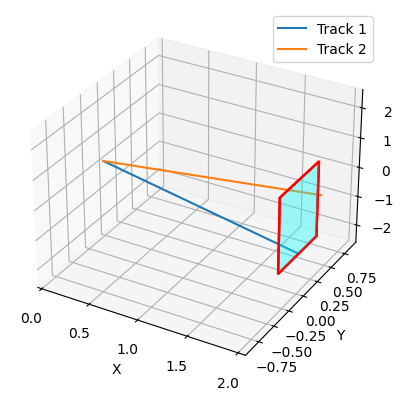

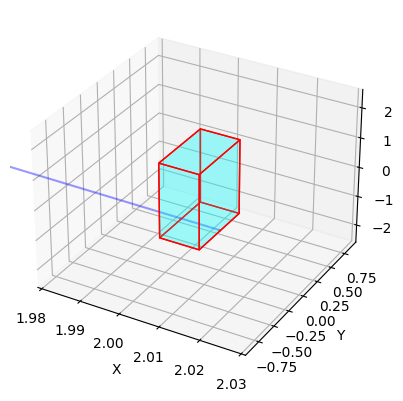

In [382]:

### Testing particle tracks
track_id = 1
init_vertex = (0, 0, 0)
init_dir_vector = (1, 0, -0.6)
energy = 1.0 # MeV

track1 = ParticleTrack(track_id, energy, init_vertex, init_dir_vector, quartz_position, quartz_params, particle_type="electron")
track1.print_info()

track_id = 2
init_vertex = (0, 0, 0)
init_dir_vector = (1, 0.2, 0)
energy = 13.0 # MeV

track2 = ParticleTrack(track_id, energy, init_vertex, init_dir_vector, quartz_position, quartz_params, particle_type="muon")
track2.print_info()




tracks_list = [track1, track2]
cherenkov_track_list = []
visulise_tracks(tracks_list, quartz_position, quartz_params)
visulise_quartz(tracks_list, cherenkov_track_list, quartz_position, quartz_params)




Track ID: 1
Daughter Track ID: 0
Particle Type: photon
Energy: 1 MeV
Initial Vertex: [ 2.00028703  0.         -1.20017222]
Initial Direction Vector: [0.64526979 0.52276176 0.557088  ]
Surface Intersections: [array([ 2.00028703,  0.        , -1.20017222]), array([ 2.01      ,  0.00786891, -1.19178661]), array([ 2.        ,  0.01597035, -1.1831532 ]), array([ 2.01      ,  0.0240718 , -1.17451979]), array([ 2.        ,  0.03217324, -1.16588638]), array([ 2.01      ,  0.04027469, -1.15725297]), array([ 2.        ,  0.04837613, -1.14861955]), array([ 2.01      ,  0.05647758, -1.13998614]), array([ 2.        ,  0.06457902, -1.13135273]), array([ 2.01      ,  0.07268047, -1.12271932]), array([ 2.        ,  0.08078191, -1.1140859 ]), array([ 2.01      ,  0.08888336, -1.10545249]), array([ 2.        ,  0.0969848 , -1.09681908]), array([ 2.01      ,  0.10508624, -1.08818567]), array([ 2.        ,  0.11318769, -1.07955226]), array([ 2.01      ,  0.12128913, -1.07091884]), array([ 2.        ,  0.1

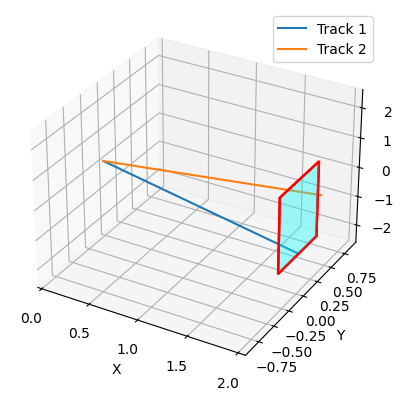

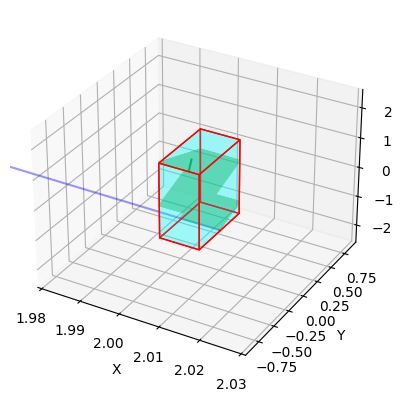

In [383]:
### Testing cherenkov photon class
n_cher_per_track = 1 # number of photons each particle produces, 1 cm thickness of quartz can produce ~ 30 detected photons/track (assuming a “reasonable” quantum efficiency) SOURCE: 
 
cherenkov_photons_list = []
for track in tracks_list:
    c_photon_v_list = track.radiate_cherenkov(n_cher_per_track)
    for dt_id, cherenkov_photon_vert in enumerate(c_photon_v_list):
        cherenkov_photons_list.append(cherenkov_photon(track.track_id, dt_id, 1, cherenkov_photon_vert, quartz_params, quartz_position))

for photon in cherenkov_photons_list[:2]:
    photon.print_info()

visulise_tracks(tracks_list, quartz_position, quartz_params)

visulise_quartz(tracks_list, cherenkov_photons_list, quartz_position, quartz_params)

MCP intersection
MCP intersection
MCP intersection
MCP intersection
MCP intersection


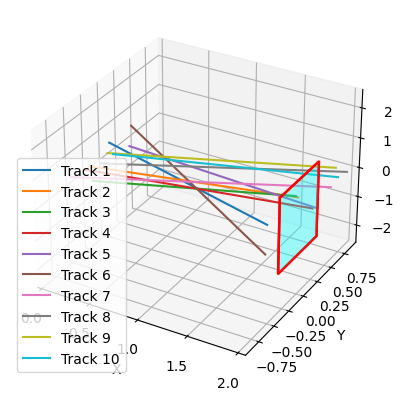

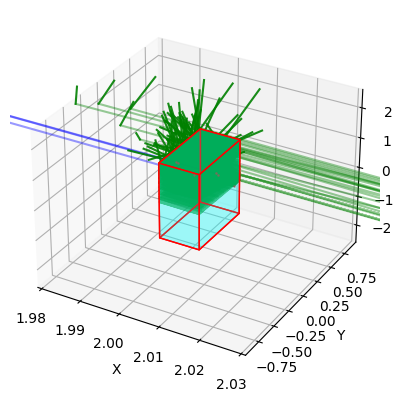

In [384]:
## Example of generating multiple tracks and photons
num_of_particles = 10
n_cher_per_track = 30   # SHOULD BE 30 FOR REALISTIC SIMULATION DUE TO QUANTUM EFFICIENCY OF THE DETECTOR

tracks_list = []
cherenkov_photons_list = []
radiator_exit_vertex_list = []
radiator_exit_direction_vector_list = []
for i in range (num_of_particles):
    track_id = i + 1
    init_vertex = (0, np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5))
    init_dir_vector = (1, np.random.uniform(-0.5, 0.5), np.random.uniform(-0.5, 0.5))
    distance_to_quartz = 2 # m
    quartz_depth = 0.01 # m
    energy = 13.0 # MeV
    genrated_track = ParticleTrack(track_id, energy, init_vertex, init_dir_vector, quartz_position, quartz_params, particle_type="muon")
    tracks_list.append(genrated_track)
    if genrated_track.track_hit_radiator:
        for dt_id, cherenkov_photon_vert in enumerate(genrated_track.radiate_cherenkov(n_cher_per_track)):
            photon = cherenkov_photon(track_id, dt_id+1, 1, cherenkov_photon_vert, quartz_params, quartz_position)
            cherenkov_photons_list.append(photon)
            radiator_exit_vertex_list.append(photon.radiator_exit_vertex)
            radiator_exit_direction_vector_list.append(photon.radiator_exit_direction_vector)

visulise_tracks(tracks_list, quartz_position, quartz_params)

visulise_quartz(tracks_list, cherenkov_photons_list, quartz_position, quartz_params)

### FOCUSING BLOCK ###

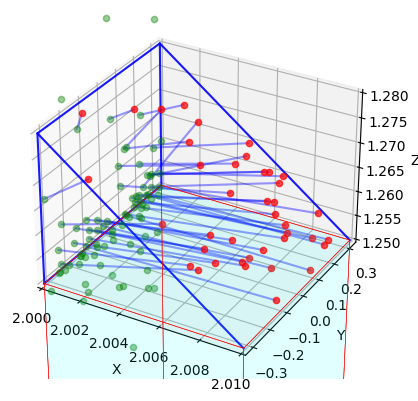

In [385]:
def visulise_radiator_mouth(cherenkov_photons_list, quartz_position, quartz_params):     
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    half_quartz_width = quartz_width / 2
    half_quartz_height = quartz_height / 2
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create top of Quartz Radiator
    verts = define_quartz(quartz_params, quartz_position)
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=0.4, edgecolors='r', alpha=.06))
    
    # Define vertices with symmetry on y and z dimensions
    corner_coords = np.array([
        [qax, qay - half_quartz_width, qaz + half_quartz_height],# Bottom-left corner
        [qax, qay + half_quartz_width, qaz + half_quartz_height], # Bottom-right corner
        [qax, qay + half_quartz_width, qaz + half_quartz_height + 0.03], # Top-right corner + 3cm comes from the images in forty
        [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03],# Top-left corner + 3cm comes from the images in forty
        [qax, qay - half_quartz_width, qaz + half_quartz_height] # Bottom-left corner home
    ])

    # plot line between each corner
    ax.plot(corner_coords[:, 0], corner_coords[:, 1], corner_coords[:, 2], c='b', alpha=0.9)

    far_corner_coords = np.array([
        [qax + quartz_depth, qay - half_quartz_width, qaz + half_quartz_height],# Bottom-left corner
        [qax + quartz_depth, qay + half_quartz_width, qaz + half_quartz_height], # Bottom-right corner
    ])

    # plot line between each of the top corners and the corresponding oppsoite side corner on the far side of the cube
    ax.plot([corner_coords[2, 0], far_corner_coords[1, 0]], [corner_coords[2, 1], far_corner_coords[1, 1]], [corner_coords[2, 2], far_corner_coords[1, 2]], c='b', alpha=0.9)
    ax.plot([corner_coords[3, 0], far_corner_coords[0, 0]], [corner_coords[3, 1], far_corner_coords[0, 1]], [corner_coords[3, 2], far_corner_coords[0, 2]], c='b', alpha=0.9)

   
    ##### TRACKS #####
    # plot cherenkov photon tracks
    for cherenkov_track in cherenkov_photons_list:
        track_id, daughter_id, reflection_vertex_list = cherenkov_track.get_track_data()

        reflection_vertex_list = np.array(reflection_vertex_list)
        radiator_exit_vertex = reflection_vertex_list[-1]
        radiator_exit_direction_vector = cherenkov_track.radiator_exit_direction_vector

        # plot line betwwen each track point
        #ax.plot(reflection_vertex_list[:, 0], reflection_vertex_list[:, 1], reflection_vertex_list[:, 2], c='g', alpha=0.2)

    # plot cherenkov photons final positions
    for cherenkov_track in cherenkov_photons_list:
        track_id, daughter_id, reflection_vertex_list = cherenkov_track.get_track_data()
        radiator_exit_vertex = cherenkov_track.radiator_exit_vertex
        #radiator_exit_direction_vector = cherenkov_track.radiator_exit_direction_vector
        ax.scatter(radiator_exit_vertex[0], radiator_exit_vertex[1], radiator_exit_vertex[2], c='g', alpha=0.4)

        mouth_exit_vertex = cherenkov_track.radiator_mouth_exit_vertex
        #mouth_exit_direction_vector = cherenkov_track.radiator_mouth_exit_direction_vector
        ax.scatter(mouth_exit_vertex[0], mouth_exit_vertex[1], mouth_exit_vertex[2], c='r', alpha=0.7)
        
        # plot a short line that extends from the radiator exit vertex to the mouth exit vertex
        ax.plot([radiator_exit_vertex[0], mouth_exit_vertex[0]],
                [radiator_exit_vertex[1], mouth_exit_vertex[1]],
                [radiator_exit_vertex[2], mouth_exit_vertex[2]], c='b', alpha=0.4)

        

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')    
    ax.set_xlim(qax , qax + (quartz_depth))
    ax.set_ylim(qay-(quartz_width/2), qay + (quartz_width/2))
    ax.set_zlim(1.25, 1.28)
    #ax.set_zlim(qaz+(quartz_height/2), qaz+(quartz_height/2))

    # set plot view
    #ax.view_init(azim=180, elev=0)
    plt.show()


visulise_radiator_mouth(cherenkov_photons_list, quartz_position, quartz_params)

In [386]:
# REFECTION IN THE FOCUSING BLOCK MOUTH



### NOT SURE IF ANGLED SIDES ARE REFLECTIVE?

#### BUT BACK SIDE IS REFLECTIVE

##DUE TO THIS ALL PHOTNS THAT HIT SIDES ARE LOST??




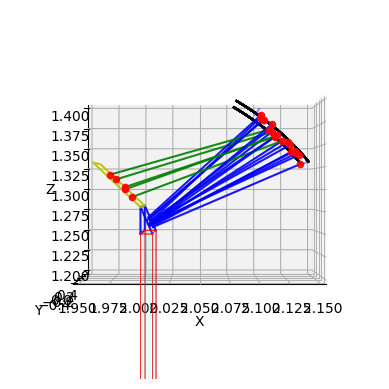

In [387]:
def create_mirror(mirror_position):
        
    def make_curve(mirror_position):
        # Define parameters for the circle segment perimeter
        center = mirror_position
        radius = 0.26
        focal_length = radius / 2
        start_angle = 31.5  # in degrees
        end_angle = 51.8   # in degrees
        num_points = 1000  # Number of points to approximate the perimeter

        # Draw the circle segment perimeter in 3D
        angles = np.linspace(start_angle, end_angle, num_points)
        #points = np.vstack([center + np.array([radius * np.cos(np.radians(a)), radius * np.sin(np.radians(a)), 0]) for a in angles]) # aligned in z
        #points = np.vstack([center + np.array([0, radius * np.cos(np.radians(a)), radius * np.sin(np.radians(a))]) for a in angles]) # aligned in x
        points = np.vstack([center + np.array([radius * np.cos(np.radians(a)), 0, radius * np.sin(np.radians(a))]) for a in angles]) # aligned in y
        
        return points
    
    #mirror_position_t = mirror_coords[3] # top left corner
    #mirror_position_b = mirror_coords[0] # bottom left corner
    points1 = make_curve(np.array([2.0-0.08, -0.33, 1.25 - 0.055])) ### DEFINE FROM ARGUMENT INSTEAD 

    #mirror_position_t = mirror_coords[2] # top right corner
    #mirror_position_b = mirror_coords[1] # bottom right corner
    points2 = make_curve(np.array([2.0-0.08, .33, 1.25 - 0.055]))

    return points1, points2

def visulise_focusing_block(cherenkov_photons_list, quartz_position, quartz_params):     
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    half_quartz_width = quartz_width / 2
    half_quartz_height = quartz_height / 2
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create top of Quartz Radiator
    verts = define_quartz(quartz_params, quartz_position)
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=0.4, edgecolors='r', alpha=.06))
    
    # Define vertices with symmetry on y and z dimensions
    corner_coords = np.array([
        [qax, qay - half_quartz_width, qaz + half_quartz_height],# Bottom-left corner
        [qax, qay + half_quartz_width, qaz + half_quartz_height], # Bottom-right corner
        [qax, qay + half_quartz_width, qaz + half_quartz_height + 0.03], # Top-right corner + 3cm comes from the images in forty
        [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03],# Top-left corner + 3cm comes from the images in forty
        [qax, qay - half_quartz_width, qaz + half_quartz_height] # Bottom-left corner home
    ])

    # plot line between each corner
    ax.plot(corner_coords[:, 0], corner_coords[:, 1], corner_coords[:, 2], c='b', alpha=0.9)

    far_corner_coords = np.array([
        [qax + quartz_depth, qay - half_quartz_width, qaz + half_quartz_height],# Bottom-left corner
        [qax + quartz_depth, qay + half_quartz_width, qaz + half_quartz_height], # Bottom-right corner
    ])

    # plot line between each of the top corners and the corresponding oppsoite side corner on the far side of the cube
    ax.plot([corner_coords[2, 0], far_corner_coords[1, 0]], [corner_coords[2, 1], far_corner_coords[1, 1]], [corner_coords[2, 2], far_corner_coords[1, 2]], c='b', alpha=0.9)
    ax.plot([corner_coords[3, 0], far_corner_coords[0, 0]], [corner_coords[3, 1], far_corner_coords[0, 1]], [corner_coords[3, 2], far_corner_coords[0, 2]], c='b', alpha=0.9)


    ##### MIRROR #####

    # Define the corner coordinates
    mirror_coords = np.array([
        [qax + 0.14, qay - half_quartz_width, qaz + half_quartz_height + 0.08],  # Bottom-left corner   # size and position of mirror taken from forty 
        [qax + 0.14, qay + half_quartz_width, qaz + half_quartz_height + 0.08],  # Bottom-right corner
        [qax + 0.10, qay - half_quartz_width, qaz + half_quartz_height + 0.14],  # Top-right corner
        [qax + 0.10, qay + half_quartz_width, qaz + half_quartz_height + 0.14]   # Top-left corner
    ])

    # PLOT MIRROR curves
    points1, points2 = create_mirror(mirror_coords)
    for i in range(len(points1) - 1):
        ax.plot([points1[i][0], points1[i + 1][0]], 
                [points1[i][1], points1[i + 1][1]], 
                [points1[i][2], points1[i + 1][2]], color="black")

    for i in range(len(points2) - 1):
        ax.plot([points2[i][0], points2[i + 1][0]], 
                [points2[i][1], points2[i + 1][1]], 
                [points2[i][2], points2[i + 1][2]], color="black")


    #PLOT LINES BETWEEN first two corner coordinates
    ax.plot([mirror_coords[0][0], mirror_coords[1][0]],
            [mirror_coords[0][1], mirror_coords[1][1]],
            [mirror_coords[0][2], mirror_coords[1][2]], c='b', alpha=0.4)

    # plot line between last two corner coordinates
    ax.plot([mirror_coords[2][0], mirror_coords[3][0]],
            [mirror_coords[2][1], mirror_coords[3][1]],
            [mirror_coords[2][2], mirror_coords[3][2]], c='b', alpha=0.4)

    
    ##### MCP #####

    # Define the corner coordinates
    mcp_coords = np.array([ [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03],# Bottom-left corner
                            [qax, qay + half_quartz_width, qaz + half_quartz_height + 0.03], # Bottom-right corner
                            [qax-0.04, qay + half_quartz_width, qaz + half_quartz_height + 0.08], # Top-right corner + 3cm comes from the images in forty
                            [qax-0.04, qay - half_quartz_width, qaz + half_quartz_height + 0.08],# Top-left corner + 3cm comes from the images in forty
                            [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03] # Bottom-left corner home
                        ])

    # plot line between each corner
    ax.plot(mcp_coords[:, 0], mcp_coords[:, 1], mcp_coords[:, 2], c='y', alpha=0.9)

    
    ##### TRACKS #####
    # plot cherenkov photon tracks
    for cherenkov_track in cherenkov_photons_list:
        track_id, daughter_id, reflection_vertex_list = cherenkov_track.get_track_data()

        reflection_vertex_list = np.array(reflection_vertex_list)
        radiator_exit_vertex = reflection_vertex_list[-1]
        radiator_exit_direction_vector = cherenkov_track.radiator_exit_direction_vector

        # plot line betwwen each track point
        #ax.plot(reflection_vertex_list[:, 0], reflection_vertex_list[:, 1], reflection_vertex_list[:, 2], c='g', alpha=0.2)
    
    # plot cherenkov photons final positions
    for cherenkov_track in cherenkov_photons_list:
        track_id, daughter_id, reflection_vertex_list = cherenkov_track.get_track_data()
        radiator_exit_vertex = cherenkov_track.radiator_exit_vertex
        #radiator_exit_direction_vector = cherenkov_track.radiator_exit_direction_vector
        #ax.scatter(radiator_exit_vertex[0], radiator_exit_vertex[1], radiator_exit_vertex[2], c='g', alpha=0.6)
        
        mouth_exit_vertex = cherenkov_track.radiator_mouth_exit_vertex
        #mouth_exit_direction_vector = cherenkov_track.radiator_mouth_exit_direction_vector
        #ax.scatter(mouth_exit_vertex[0], mouth_exit_vertex[1], mouth_exit_vertex[2], c='r', alpha=0.9)
        """
        # plot a short line that extends from the radiator exit vertex to the mouth exit vertex
        ax.plot([radiator_exit_vertex[0], mouth_exit_vertex[0]],
                [radiator_exit_vertex[1], mouth_exit_vertex[1]],
                [radiator_exit_vertex[2], mouth_exit_vertex[2]], c='b', alpha=0.9)
        """
        # plot line from mouth exit vertex to the mirror intersection
        ax.plot([mouth_exit_vertex[0], cherenkov_track.mirror_reflection_coordinate[0]],
                [mouth_exit_vertex[1], cherenkov_track.mirror_reflection_coordinate[1]],
                [mouth_exit_vertex[2], cherenkov_track.mirror_reflection_coordinate[2]], c='b', alpha=0.9)
        
        """
        # plot short line that extends from the mirror intersection following the direction vector
        ax.plot([cherenkov_track.mirror_reflection_coordinate[0], cherenkov_track.mirror_reflection_coordinate[0] + cherenkov_track.mirror_reflection_direction_vector[0]],
                [cherenkov_track.mirror_reflection_coordinate[1], cherenkov_track.mirror_reflection_coordinate[1] + cherenkov_track.mirror_reflection_direction_vector[1]],
                [cherenkov_track.mirror_reflection_coordinate[2], cherenkov_track.mirror_reflection_coordinate[2] + cherenkov_track.mirror_reflection_direction_vector[2]], c='b', alpha=0.9)

        """

        # plot line from mirror intersection to the mcp intersection
        ax.plot([cherenkov_track.mirror_reflection_coordinate[0], cherenkov_track.mcp_global_coordinate[0]],
                [cherenkov_track.mirror_reflection_coordinate[1], cherenkov_track.mcp_global_coordinate[1]],
                [cherenkov_track.mirror_reflection_coordinate[2], cherenkov_track.mcp_global_coordinate[2]], c='g', alpha=0.9)
        
        # plot scatter points at the mirror and mcp intersection
        ax.scatter(cherenkov_track.mirror_reflection_coordinate[0], cherenkov_track.mirror_reflection_coordinate[1], cherenkov_track.mirror_reflection_coordinate[2], c='r', alpha=0.9)
        ax.scatter(cherenkov_track.mcp_global_coordinate[0], cherenkov_track.mcp_global_coordinate[1], cherenkov_track.mcp_global_coordinate[2], c='r', alpha=0.9)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')    
    ax.set_xlim(1.95, 2.15)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(qaz+(quartz_height/2)-0.05, 1.4)
    #ax.set_zlim(qaz+(quartz_height/2), qaz+(quartz_height/2))

    # set plot view
    ax.view_init(azim=270, elev=0)
    plt.show()

visulise_focusing_block(cherenkov_photons_list, quartz_position, quartz_params)

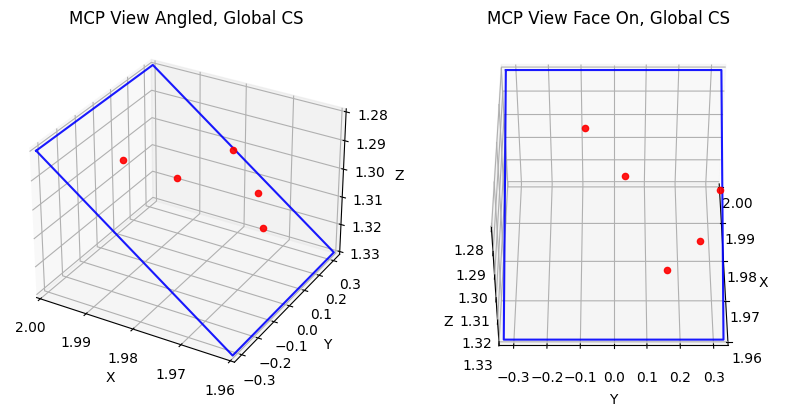

In [388]:
import math

def visulise_MCP_global(cherenkov_photons_list, quartz_position, quartz_params):     
    quartz_depth, quartz_height, quartz_width = quartz_params
    qax, qay, qaz = quartz_position
    half_quartz_width = quartz_width / 2
    half_quartz_height = quartz_height / 2
    
    
    fig = plt.figure(figsize=(10, 20))
    ax = fig.add_subplot(122, projection='3d')
    ax2 = fig.add_subplot(121, projection='3d')

    # Define the corner coordinates
    mcp_coords = np.array([ [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03],# Bottom-left corner
                            [qax, qay + half_quartz_width, qaz + half_quartz_height + 0.03], # Bottom-right corner
                            [qax-0.04, qay + half_quartz_width, qaz + half_quartz_height + 0.08], # Top-right corner + 3cm comes from the images in forty
                            [qax-0.04, qay - half_quartz_width, qaz + half_quartz_height + 0.08],# Top-left corner + 3cm comes from the images in forty
                            [qax, qay - half_quartz_width, qaz + half_quartz_height + 0.03] # Bottom-left corner home
                        ])

    # plot line between each corner
    ax.plot(mcp_coords[:, 0], mcp_coords[:, 1], mcp_coords[:, 2], c='b', alpha=0.9)
    ax2.plot(mcp_coords[:, 0], mcp_coords[:, 1], mcp_coords[:, 2], c='b', alpha=0.9)

    # plot scatte rpoint for each mcp intersection
    for cherenkov_track in cherenkov_photons_list:
        ax.scatter(cherenkov_track.mcp_global_coordinate[0], cherenkov_track.mcp_global_coordinate[1], cherenkov_track.mcp_global_coordinate[2], c='r', alpha=0.9)
        ax2.scatter(cherenkov_track.mcp_global_coordinate[0], cherenkov_track.mcp_global_coordinate[1], cherenkov_track.mcp_global_coordinate[2], c='r', alpha=0.9)
    
    for axes in ([ax, ax2]):
        axes.set_xlabel('X')
        axes.set_ylabel('Y')
        axes.set_zlabel('Z')
        axes.set_xlim(qax, qax-0.04)
        axes.set_ylim(qay - half_quartz_width, qay + half_quartz_width)
        axes.set_zlim(qaz + half_quartz_height + 0.08, qaz + half_quartz_height + 0.03)

    # calculate the angle betweeen z= (qaz + half_quartz_height + 0.08) and z= (qaz + half_quartz_height + 0.03)
    x1, y1 = qax, qax-0.04
    x2, y2 = qaz + half_quartz_height + 0.08, qaz + half_quartz_height + 0.03
    angle_rad = math.atan2(y2 - y1, x2 - x1)
    angle_deg = math.degrees(angle_rad) + 180

    ax.set_title("MCP View Face On, Global CS")
    ax2.set_title("MCP View Angled, Global CS")
    # set plot view
    ax.view_init(azim=0, elev=angle_deg)


    plt.show()


visulise_MCP_global(cherenkov_photons_list, quartz_position, quartz_params)

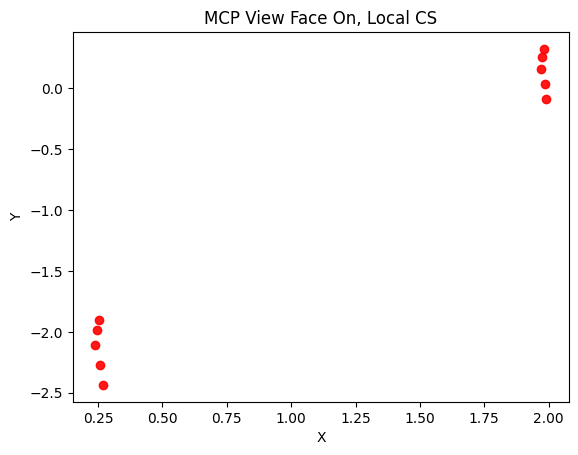

In [389]:



def visulise_MCP_local(cherenkov_photons_list):
    for cherenkov_track in cherenkov_photons_list:
        x, y, z = cherenkov_track.MCP_local_coordinate
        plt.scatter(x, y, c='r', alpha=0.9)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("MCP View Face On, Local CS")

visulise_MCP_local(cherenkov_photons_list)

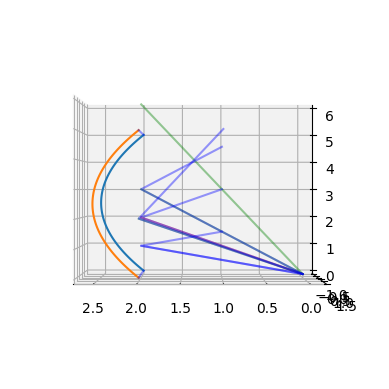

In [390]:
###### CREATING SIMPLE FLAT MIRROR REFLECTION AND CURVED MIRROR VISUALS #####

quartz_depth, quartz_height, quartz_width = quartz_params
qax, qay, qaz = quartz_position


import numpy as np
import matplotlib.pyplot as plt


# Define the corner coordinates
corner_coords = np.array([
    [2, -1, 0],  # Bottom-left corner
    [2, 1, 0],  # Bottom-right corner
    [2, -1, 5],  # Top-right corner
    [2, 1, 5]   # Top-left corner
])


def make_curve(angle_degrees, mirror_position):
    # Convert angle to radians
    angle_radians = np.radians(angle_degrees)

    # Define the corner coordinates
    mir_x, mir_y, mir_z = mirror_position
    theta = np.linspace(-angle_radians, angle_radians, 100)  # Angle in radians
    z = np.linspace(0, mir_z, 100)
    x = np.linspace(mir_x, mir_x, 100) * theta**2
    y = np.linspace(-mir_y, -mir_y, 100)

    # Map x values from range 0 - 20 to range 20 - 0
    max_x = max(x)
    x = -x + max_x + 2
    return x, y, z


# User-specified angle in degrees
angle_degrees = 30

mirror_position = corner_coords[3] # top left corner
x1, y1, z1 = make_curve(angle_degrees, mirror_position)
mirror_position = corner_coords[2] # top right corner
x2, y2, z2 = make_curve(angle_degrees, mirror_position)

x_curve = x1 # x1 and x2 are the same

# Dummy tracks

track1 = np.array([[0, 0, 0], [1, 0, 0.5], [2, 0, 1]])
track2 = np.array([[0, 0, 0], [1, 0, 1], [2, 0, 2]])
track3 = np.array([[0, 0, 0], [1, 0, 1.5], [2, 0, 3]])
track4 = np.array([[0, 0, 0], [1, 0, 3], [2, 0, 6]])
track5 = np.array([[0, 0, 0], [1, 0.48, 1], [2, 0.96, 2]])

traks = [track1, track2, track3, track4, track5]
directions = np.array([(1, 0, 0.5), (1, 0, 1), (1, 0, 1.5), (1, 0, 3), (1, 0.48, 3)])

reflections = []
for track, direction in zip(traks, directions):
    ref = np.array([(np.nan, np.nan, np.nan)])
    if track[2][1] > -1 and track[2][1] < 1 and track[2][2] > 0 and track[2][2] < 5:
        #print("hit")
        direction[0] *= -1 # reflect in x direction
        #print(direction)

        # from the last point of the track, propegate in the new direction
        ref = np.vstack((track, track[-1] + direction))

    else:
        #print("no hit")
        pass
    reflections.append(ref)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# PLOT MIRROR curves
ax.plot(x1, y1, z1)
ax.plot(x2, y2, z2)

#PLOT LINES BETWEEN first two corner coordinates
ax.plot([corner_coords[0][0], corner_coords[1][0]],
        [corner_coords[0][1], corner_coords[1][1]],
        [corner_coords[0][2], corner_coords[1][2]], c='b', alpha=0.4)

# plot line between last two corner coordinates
ax.plot([corner_coords[2][0], corner_coords[3][0]],
        [corner_coords[2][1], corner_coords[3][1]],
        [corner_coords[2][2], corner_coords[3][2]], c='b', alpha=0.4)

# Plot tracks
ax.plot(track1[:, 0], track1[:, 1], track1[:, 2], c='b', alpha=0.4, label=f"Track 1")
ax.plot(track2[:, 0], track2[:, 1], track2[:, 2], c='r', alpha=0.4, label=f"Track 2")
ax.plot(track3[:, 0], track3[:, 1], track3[:, 2], c='g', alpha=0.4, label=f"Track 3")
ax.plot(track4[:, 0], track4[:, 1], track4[:, 2], c='g', alpha=0.4, label=f"Track 4")
ax.plot(track5[:, 0], track5[:, 1], track5[:, 2], c='g', alpha=0.4, label=f"Track 5")

# plot reflections
for reflection_val in reflections:
    ax.plot(reflection_val[:, 0], reflection_val[:, 1], reflection_val[:, 2], c='b', alpha=0.4, label=f"Track 1")
    
ax.view_init(azim=90, elev=0)
plt.show()

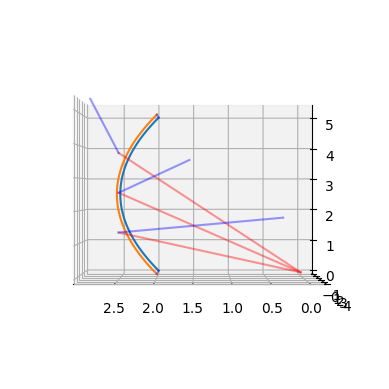

In [391]:
##### ADDING CURVATURE OF MIRROR TO REFLECTION SIMULATION #####

quartz_depth, quartz_height, quartz_width = quartz_params
qax, qay, qaz = quartz_position


def make_curve(angle_degrees, mirror_position):
    angle_radians = np.radians(angle_degrees)
    mir_x, mir_y, mir_z = mirror_position

    theta = np.linspace(-angle_radians, angle_radians, 100)
    z = np.linspace(0, mir_z, 100)
    x = -mir_x * theta**2 + max(mir_x * theta**2) + 2
    y = np.full(100, -mir_y)

    return x, y, z

# Define the corner coordinates
corner_coords = np.array([
    [2, -1, 0],  # Bottom-left corner
    [2, 1, 0],  # Bottom-right corner
    [2, -1, 5],  # Top-right corner
    [2, 1, 5]   # Top-left corner
])


def calculate_x(angle_degrees, mirror_position, target_z):
    angle_radians = np.radians(angle_degrees)
    mir_x, _, mir_z = mirror_position

    theta = np.linspace(-angle_radians, angle_radians, 10000)   ##### THIS 10000 will make it slow?!?!? parmaterise
    z = np.linspace(0, mir_z, 10000)           ##### THIS 10000 will make it slow?!?!? parmaterise
    
    # find the index of the z value closest to the target z
    idx = (np.abs(z - target_z)).argmin()

    # calculate the theta value at that index
    theta_at_idx = theta[idx]
    
    x = -mir_x * theta_at_idx**2 + (mir_x * theta_at_idx**2) + 2

    return x





# User-specified angle in degrees
angle_degrees = 30

mirror_position = corner_coords[3] # top left corner
x1, y1, z1 = make_curve(angle_degrees, mirror_position)
mirror_position = corner_coords[2] # top right corner
x2, y2, z2 = make_curve(angle_degrees, mirror_position)

back_of_mirror_curve_coord = max(x1) # x1 and x2 are the same

# Dummy tracks

track1 = np.array([0,0,0])
track2 = np.array([0,0,0])
track3 = np.array([0,0,0])
track4 = np.array([0,0,0])
track5 = np.array([0,0,0])


traks = [track1, track2, track3, track4, track5]
directions = np.array([(1, 0, 0.5), (1, 0, 1), (1, 0, 1.5), (1, 0, 3), (1, 0.48, 3)])
mirror_intersections = []
reflections = []

for position, direction in zip(traks, directions):
    ref = np.array([(np.nan, np.nan, np.nan)])
    intersection_point = (np.nan, np.nan, np.nan)

    # Update the track's position based on the direction vector to a x coordinate greater than the rear of the mirror's curved surface (back_of_mirror_curve_coord)
    position = position + direction * (back_of_mirror_curve_coord)# - position[0])

    # Extract position coordinates
    x, y, z = position
    x_at_pos = calculate_x(angle_degrees, mirror_position, z)
    
    # Check if the track has intersected with the mirror's curved surface
    if y >= corner_coords[0][1] and y <= corner_coords[1][1] and z >= corner_coords[0][2] and z <= corner_coords[2][2] and x >= x_at_pos:
        intersection_point = position
        #print("hit")
        # Store the intersection point in the reflections list
        
        direction[0] *= -1 # reflect in x direction
        # from the last point of the track, propegate in the new direction
        ref = np.vstack((position, position[-1] + direction))
        
    else:
        #print("no hit")
        pass
    
    mirror_intersections.append(intersection_point)
    reflections.append(ref)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# PLOT MIRROR curves
ax.plot(x1, y1, z1)
ax.plot(x2, y2, z2)

#PLOT LINES BETWEEN first two corner coordinates
ax.plot([corner_coords[0][0], corner_coords[1][0]],
        [corner_coords[0][1], corner_coords[1][1]],
        [corner_coords[0][2], corner_coords[1][2]], c='b', alpha=0.4)

# plot line between last two corner coordinates
ax.plot([corner_coords[2][0], corner_coords[3][0]],
        [corner_coords[2][1], corner_coords[3][1]],
        [corner_coords[2][2], corner_coords[3][2]], c='b', alpha=0.4)

# Plot lines from track to intersection point for each track and interation point pair
for track, intersection_point in zip(traks, mirror_intersections):
    ax.plot([track[0], intersection_point[0]],
            [track[1], intersection_point[1]],
            [track[2], intersection_point[2]], c='r', alpha=0.4)

# plot reflections
for reflection_val in reflections:
    ax.plot(reflection_val[:, 0], reflection_val[:, 1], reflection_val[:, 2], c='b', alpha=0.4, label=f"Track 1")
    
ax.view_init(azim=90, elev=0)
plt.show()


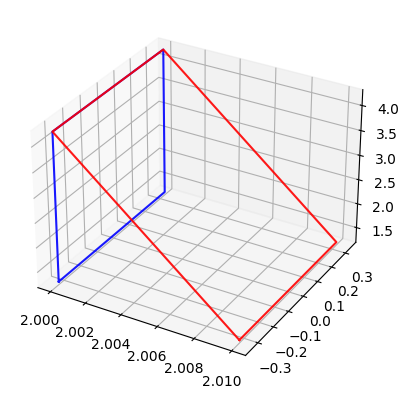

In [392]:
qax, qay, qaz = quartz_position
quartz_depth, quartz_height, quartz_width = quartz_params
half_quartz_width = quartz_width / 2
half_quartz_height = quartz_height / 2

# BACK WALL
plane_corners = np.array([
    [qax, qay - half_quartz_width, qaz + half_quartz_height],# Bottom-left corner
    [qax, qay + half_quartz_width, qaz + half_quartz_height], # Bottom-right corner
    [qax, qay + half_quartz_width, qaz + half_quartz_height + 3], # Top-right corner + 3cm comes from the images in forty
    [qax, qay - half_quartz_width, qaz + half_quartz_height + 3],# Top-left corner + 3cm comes from the images in forty
    [qax, qay - half_quartz_width, qaz + half_quartz_height] # Bottom-left corner home
    ])

# Check for reflection in the focusing block mouth off the side walls. SHOULD THESE BE DISCAREDED OR REFLECTED?????? I GUES REFLECTED AND A SOURCE OF POTENTIAL NOISE??
#CODE#

### MOUTH OF FOCUSING BLOCK ###
mouth_corners = np.array([
    [qax + quartz_depth, qay - half_quartz_width, qaz + half_quartz_height],# Bottom-left corner
    [qax+ quartz_depth, qay + half_quartz_width, qaz + half_quartz_height], # Bottom-right corner
    [qax, qay + half_quartz_width, qaz + half_quartz_height + 3], # Top-right corner + 3cm comes from the images in forty
    [qax, qay - half_quartz_width, qaz + half_quartz_height + 3],# Top-left corner + 3cm comes from the images in forty
    [qax+ quartz_depth, qay - half_quartz_width, qaz + half_quartz_height] # Bottom-left corner home
    ])  


# plot both planes in 3d space

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



# plot line between each corner
ax.plot(plane_corners[:, 0], plane_corners[:, 1], plane_corners[:, 2], c='b', alpha=0.9)
ax.plot(mouth_corners[:, 0], mouth_corners[:, 1], mouth_corners[:, 2], c='r', alpha=0.9)
plt.show()